In [ ]:
'''環境確認'''

import sys
import torch

print("Pythonのバージョン：",sys.version)
print("PyTorchのバージョン：", torch.__version__)
print("使用しているGPUの確認")
!nvidia-smi

Pythonのバージョン： 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
PyTorchのバージョン： 1.10.0+cu111
使用しているGPUの確認
Wed Feb  9 06:09:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    56W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----

In [ ]:
# ライブラリのインポート
import random
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms
import torchvision.utils as vutils

import os

# ランダムシードの設定
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [ ]:
'''MNISTデータセットをダウンロード'''

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home="./data/", as_frame=False) 

# データの取り出し
X = mnist.data
y = mnist.target

# フォルダ「data」の下にフォルダ「img_78」を作成する
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1
        
    # 7と8を200枚ずつ作成したらbreak
    if (count7>=max_num) and (count8>=max_num):
        break

# フォルダ「data」の下にフォルダ「test」を作成する
data_dir_path = "./data/test/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# 上記で7,8の画像を作成するのに使用したindexの最終値
i_start = i+1
print(i_start)

# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count2=0
count7=0
count8=0
max_num=20  # 画像は5枚ずつ作成する

for i in range(i_start,len(X)):  # i_startから始める
    
    # 画像2の作成
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count2+=1
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1

# フォルダ「data」の下にフォルダ「img_78_28size」を作成する
data_dir_path = "./data/img_78_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# MNISTから数字7、8の画像だけフォルダ「img_78_28size」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count8+=1
    
    if (count7>=max_num) and (count8>=max_num):
        break

# フォルダ「data」の下にフォルダ「test」を作成する
data_dir_path = "./data/test_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# 上記で7,8の画像を作成するのに使用したindexの最終値
i_start = i+1
print(i_start)

# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count2=0
count7=0
count8=0
max_num=20  # 画像は20枚ずつ作成する

for i in range(i_start,len(X)):  # i_startから始める
    
    # 画像2の作成
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test_28size/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count2+=1 
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count8+=1

2244
2244


In [ ]:
'''デバイスの設定'''

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
'''初期設定'''

dir_path = "/content/drive/My Drive/Colab Notebooks/EfficientGAN/result"
os.makedirs(dir_path, exist_ok=True)

model_name = "EfficientGAN"
f_path_result = f"/content/drive/My Drive/Colab Notebooks/EfficientGAN/result/{model_name}"
f_path_params = f"/content/drive/My Drive/Colab Notebooks/EfficientGAN/params/{model_name}"

os.makedirs(f_path_result, exist_ok=True)
os.makedirs(f_path_params, exist_ok=True)

image_size = 64

In [ ]:
'''ハイパーパラメータの設定'''

import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--num_epochs", type=int, default=1500)
parser.add_argument("--batch_size", type=int, default=64)
parser.add_argument("--lr_ge", type=float, default=1e-4)
parser.add_argument("--lr_d", type=float, default=0.0001/4)
parser.add_argument("--z_dim", type=int, default=20) # ノイズの次元
parser.add_argument("--beta1", type=float, default=0.5) # Adamのハイパーパラメータ
parser.add_argument("--beta2", type=float, default=0.999) # Adamのハイパーパラメータ
opt = parser.parse_args(args=[])
print(opt)

Namespace(batch_size=64, beta1=0.5, beta2=0.999, lr_d=2.5e-05, lr_ge=0.0001, num_epochs=1500, z_dim=20)


In [ ]:
'''Generatorの実装'''

class Generator(nn.Module):

    def __init__(self, z_dim=20):
        super(Generator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(z_dim, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True))

        self.layer2 = nn.Sequential(
            nn.Linear(1024, 7*7*128),
            nn.BatchNorm1d(7*7*128),
            nn.ReLU(inplace=True))

        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))

        self.last = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=1,
                               kernel_size=4, stride=2, padding=1),
            nn.Tanh())
        # 白黒画像なので出力チャネルは1つだけ

    def forward(self, z):
        out = self.layer1(z)
        out = self.layer2(out)

        # 転置畳み込み層に入れるためにテンソルの形を整形
        out = out.view(z.shape[0], 128, 7, 7)
        out = self.layer3(out)
        out = self.last(out)

        return out

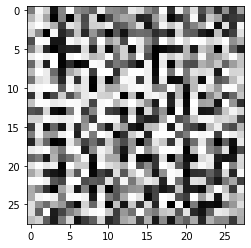

In [ ]:
# 動作確認
import matplotlib.pyplot as plt
%matplotlib inline

G = Generator(z_dim=20)
G.train()

# 入力する乱数
# バッチノーマライゼーションがあるのでミニバッチ数は2以上
input_z = torch.randn(2, 20)

# 偽画像を出力
fake_images = G(input_z)  # torch.Size([2, 1, 28, 28])
img_transformed = fake_images[0][0].detach().numpy()
plt.imshow(img_transformed, 'gray')
plt.show()

In [ ]:
'''Discriminatorの実装'''

class Discriminator(nn.Module):

    def __init__(self, z_dim=20):
        super(Discriminator, self).__init__()

        # 画像側の入力処理
        self.x_layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))
        # 注意：白黒画像なので入力チャネルは1つだけ

        self.x_layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=4,
                      stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1, inplace=True))

        # 乱数側の入力処理
        self.z_layer1 = nn.Linear(z_dim, 512)

        # 最後の判定
        self.last1 = nn.Sequential(
            nn.Linear(3648, 1024),
            nn.LeakyReLU(0.1, inplace=True))

        self.last2 = nn.Linear(1024, 1)

    def forward(self, x, z):

        # 画像側の入力処理
        x_out = self.x_layer1(x)
        x_out = self.x_layer2(x_out)

        # 乱数側の入力処理
        z = z.view(z.shape[0], -1)
        z_out = self.z_layer1(z)

        # x_outとz_outを結合し、全結合層で判定
        x_out = x_out.view(-1, 64 * 7 * 7)
        out = torch.cat([x_out, z_out], dim=1)
        out = self.last1(out)

        feature = out  # 最後にチャネルを1つに集約する手前の情報
        feature = feature.view(feature.size()[0], -1)  # 2次元に変換

        out = self.last2(out)

        return out, feature

In [ ]:
# 動作確認
D = Discriminator(z_dim=20)

# 偽画像を生成
input_z = torch.randn(2, 20)
fake_images = G(input_z)

# 偽画像をDに入力
d_out, _ = D(fake_images, input_z)

# 出力d_outにSigmoidをかけて0から1に変換
print(nn.Sigmoid()(d_out))

tensor([[0.4322],
        [0.4629]], grad_fn=<SigmoidBackward0>)


In [ ]:
'''Encoderの実装'''

class Encoder(nn.Module):

    def __init__(self, z_dim=20):
        super(Encoder, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3,
                      stride=1),
            nn.LeakyReLU(0.1, inplace=True))
        # 白黒画像なので入力チャネルは1つだけ

        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3,
                      stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1, inplace=True))

        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3,
                      stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1, inplace=True))

        # ここまでで画像のサイズは7×7になっている
        self.last = nn.Linear(128 * 7 * 7, z_dim)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)

        # FCに入れるためにテンソルの形を整形
        out = out.view(-1, 128 * 7 * 7)
        out = self.last(out)

        return out

In [ ]:
# 動作確認
E = Encoder(z_dim=20)

# 入力する画像データ
x = fake_images  # fake_imagesは上のGで作成したもの

# 画像からzをEncode
z = E(x)

print(z.shape)
print(z)

torch.Size([2, 20])
tensor([[-0.0669, -0.2844, -0.3601,  0.1404, -0.2922, -0.4834, -0.0025,  0.0258,
         -0.1298, -0.2613, -0.4292, -0.2584, -0.6141, -0.1440,  0.1142,  0.2175,
          0.0730,  0.0323, -0.7176, -0.7410],
        [ 0.4822,  0.3681, -0.0647, -0.0773,  0.0989,  0.3012,  0.8054,  0.4399,
          1.0848, -0.2809,  0.0619, -0.3179, -0.2963, -0.1192,  0.6562, -0.1707,
          0.1287, -0.6156,  0.3127, -0.4819]], grad_fn=<AddmmBackward0>)


In [ ]:
def make_datapath_list():
    """学習、検証の画像データとアノテーションデータへのファイルパスリストを作成する。 """

    train_img_list = list()  # 画像ファイルパスを格納

    for img_idx in range(200):
        img_path = "./data/img_78_28size/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/img_78_28size/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list

In [ ]:
class ImageTransform():
    """画像の前処理クラス"""

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.data_transform(img)

In [ ]:
class GAN_Img_Dataset(data.Dataset):
    """画像のDatasetクラス。PyTorchのDatasetクラスを継承"""

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        '''画像の枚数を返す'''
        return len(self.file_list)

    def __getitem__(self, index):
        '''前処理をした画像のTensor形式のデータを取得'''

        img_path = self.file_list[index]
        img = Image.open(img_path)  # [高さ][幅]白黒

        # 画像の前処理
        img_transformed = self.transform(img)

        return img_transformed

In [ ]:
# DataLoaderの作成と動作確認

# ファイルリストを作成
train_img_list=make_datapath_list()

# Datasetを作成
mean = (0.5,)
std = (0.5,)
train_dataset = GAN_Img_Dataset(
    file_list=train_img_list, transform=ImageTransform(mean, std))

# DataLoaderを作成
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

# 動作の確認
batch_iterator = iter(train_dataloader)  # イテレータに変換
imgs = next(batch_iterator)  # 1番目の要素を取り出す
print(imgs.size())  # torch.Size([64, 1, 64, 64])

torch.Size([64, 1, 28, 28])


In [ ]:
'''損失関数と最適化関数の定義'''

# 誤差関数を定義
criterion = nn.BCEWithLogitsLoss(reduction='mean')

# 最適化手法の設定
optimizerG = torch.optim.Adam(G.parameters(), opt.lr_ge, [opt.beta1, opt.beta2])
optimizerE = torch.optim.Adam(E.parameters(), opt.lr_ge, [opt.beta1, opt.beta2])
optimizerD = torch.optim.Adam(D.parameters(), opt.lr_d, [opt.beta1, opt.beta2])

In [ ]:
'''パラメータを保存する関数の定義'''

def save_params(file_path, epoch, netD, netG, netE):
    torch.save(
        netG.state_dict(),
        file_path + "/g_{:04d}.pth".format(epoch)
    )

    torch.save(
        netD.state_dict(),
        file_path + "/d_{:04d}.pth".format(epoch)
    )

    torch.save(
        netE.state_dict(),
        file_path + "/e_{:04d}.pth".format(epoch)
    )

In [ ]:
# ネットワークの初期化
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        # conv2dとConvTranspose2dの初期化
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('BatchNorm') != -1:
        # BatchNorm2dの初期化
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('Linear') != -1:
        # 全結合層Linearの初期化
        m.bias.data.fill_(0)


# 初期化の実施
G.apply(weights_init)
E.apply(weights_init)
D.apply(weights_init)

print("ネットワークの初期化完了")

ネットワークの初期化完了


In [ ]:
# モデルを学習させる関数を作成

lossesD = []
lossesG = []
lossesE = []
raw_lossesD = []
raw_lossesG = []
raw_lossesE = []

def train_model(G, D, E, dataloader, num_epochs):

    # パラメータをコーディング
    mini_batch_size = opt.batch_size

    # ネットワークをGPUへ
    G.to(device)
    E.to(device)
    D.to(device)

    G.train()  # モデルを訓練モードに
    E.train()  # モデルを訓練モードに
    D.train()  # モデルを訓練モードに

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # 画像の枚数
    num_train_imgs = len(dataloader.dataset)
    batch_size = dataloader.batch_size

    # イテレーションカウンタをセット
    iteration = 1

    # epochのループ
    for epoch in range(num_epochs):

        # 開始時刻を保存
        t_epoch_start = time.time()
        epoch_g_loss = 0.0  # epochの損失和
        epoch_e_loss = 0.0  # epochの損失和
        epoch_d_loss = 0.0  # epochの損失和

        # データローダーからminibatchずつ取り出すループ
        for imgs in dataloader:

            # ミニバッチがサイズが1だと、バッチノーマライゼーションでエラーになるのでさける
            if imgs.size()[0] == 1:
                continue

            # ミニバッチサイズの1もしくは0のラベル役のテンソルを作成
            # 正解ラベルと偽ラベルを作成
            # epochの最後のイテレーションはミニバッチの数が少なくなる
            mini_batch_size = imgs.size()[0]
            label_real = torch.full((mini_batch_size,), 1).to(device)
            label_fake = torch.full((mini_batch_size,), 0).to(device)

            # GPUが使えるならGPUにデータを送る
            imgs = imgs.to(device)

            # --------------------
            # 1. Discriminatorの学習
            # --------------------
            # 真の画像を判定　
            z_out_real = E(imgs)
            d_out_real, _ = D(imgs, z_out_real)

            # 偽の画像を生成して判定
            input_z = torch.randn(mini_batch_size, opt.z_dim).to(device)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images, input_z)

            # 誤差を計算
            label_real = label_real.type_as(d_out_real.view(-1))
            d_loss_real = criterion(d_out_real.view(-1), label_real)
            label_fake = label_fake.type_as(d_out_fake.view(-1))
            d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
            d_loss = d_loss_real + d_loss_fake

            # バックプロパゲーション
            optimizerD.zero_grad()
            d_loss.backward()
            optimizerD.step()

            # --------------------
            # 2. Generatorの学習
            # --------------------
            # 偽の画像を生成して判定
            input_z = torch.randn(mini_batch_size, opt.z_dim).to(device)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images, input_z)

            # 誤差を計算
            g_loss = criterion(d_out_fake.view(-1), label_real)

            # バックプロパゲーション
            optimizerG.zero_grad()
            g_loss.backward()
            optimizerG.step()

            # --------------------
            # 3. Encoderの学習
            # --------------------
            # 真の画像のzを推定
            z_out_real = E(imgs)
            d_out_real, _ = D(imgs, z_out_real)

            # 誤差を計算
            e_loss = criterion(d_out_real.view(-1), label_fake)

            # バックプロパゲーション
            optimizerE.zero_grad()
            e_loss.backward()
            optimizerE.step()

            # --------------------
            # 4. 記録
            # --------------------
            epoch_d_loss += d_loss.item()
            epoch_g_loss += g_loss.item()
            epoch_e_loss += e_loss.item()
            raw_lossesD.append(epoch_d_loss)
            raw_lossesG.append(epoch_g_loss)
            raw_lossesE.append(epoch_e_loss)
            iteration += 1
        
        lossesD.append(epoch_d_loss/batch_size)
        lossesE.append(epoch_e_loss/batch_size)
        lossesG.append(epoch_g_loss/batch_size)

        # パラメータ、画像を保存しない場合はコメントアウトする
        # vutils.save_image(fake_images, f_path_result + f"/{epoch+1}.jpg")
        # save_params(f_path_params, epoch, D, G, E)

        # epochのphaseごとのlossと正解率
        if epoch % 10==0:      
            t_epoch_finish = time.time()
            print('-------------')
            print('epoch {} || Epoch_D_Loss:{:.4f} ||Epoch_G_Loss:{:.4f} ||Epoch_E_Loss:{:.4f}'.format(
                epoch+1, epoch_d_loss/batch_size, epoch_g_loss/batch_size, epoch_e_loss/batch_size))
            print('timer:  {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
            t_epoch_start = time.time()

    print("総イテレーション回数:", iteration)

    return G, D, E

In [ ]:
# 学習・検証を実行する
G_update, D_update, E_update = train_model(G, D, E, dataloader=train_dataloader, num_epochs=opt.num_epochs)

-------------
epoch 1 || Epoch_D_Loss:0.1485 ||Epoch_G_Loss:0.0789 ||Epoch_E_Loss:0.0767
timer:  0.9377 sec.
-------------
epoch 11 || Epoch_D_Loss:0.1146 ||Epoch_G_Loss:0.0969 ||Epoch_E_Loss:0.1030
timer:  0.5588 sec.
-------------
epoch 21 || Epoch_D_Loss:0.0593 ||Epoch_G_Loss:0.1575 ||Epoch_E_Loss:0.1695
timer:  0.5421 sec.
-------------
epoch 31 || Epoch_D_Loss:0.0244 ||Epoch_G_Loss:0.2466 ||Epoch_E_Loss:0.2718
timer:  0.5399 sec.
-------------
epoch 41 || Epoch_D_Loss:0.0115 ||Epoch_G_Loss:0.3189 ||Epoch_E_Loss:0.3674
timer:  0.5447 sec.
-------------
epoch 51 || Epoch_D_Loss:0.0094 ||Epoch_G_Loss:0.3745 ||Epoch_E_Loss:0.3751
timer:  0.5456 sec.
-------------
epoch 61 || Epoch_D_Loss:0.0073 ||Epoch_G_Loss:0.4074 ||Epoch_E_Loss:0.4056
timer:  0.5539 sec.
-------------
epoch 71 || Epoch_D_Loss:0.0083 ||Epoch_G_Loss:0.4148 ||Epoch_E_Loss:0.3852
timer:  0.5395 sec.
-------------
epoch 81 || Epoch_D_Loss:0.0092 ||Epoch_G_Loss:0.3876 ||Epoch_E_Loss:0.3986
timer:  0.5539 sec.
-----------

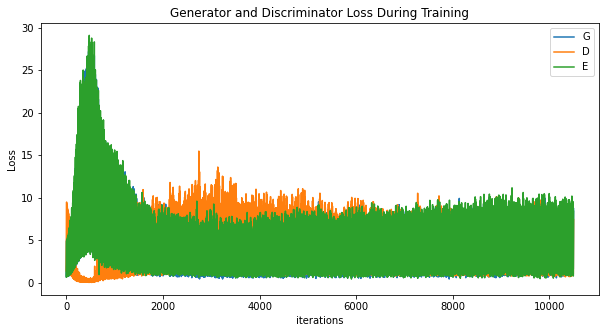

In [ ]:
'''訓練イテレーションごとの損失'''

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(raw_lossesG,label="G")
plt.plot(raw_lossesD,label="D")
plt.plot(raw_lossesE,label="E")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

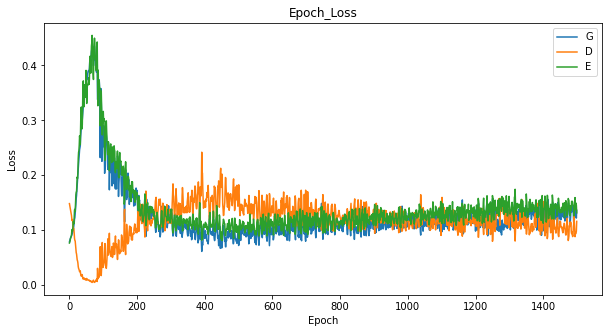

In [ ]:
'''エポックごとの損失'''

plt.figure(figsize=(10,5))
plt.title("Epoch_Loss")
plt.plot(lossesG,label="G")
plt.plot(lossesD,label="D")
plt.plot(lossesE,label="E")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

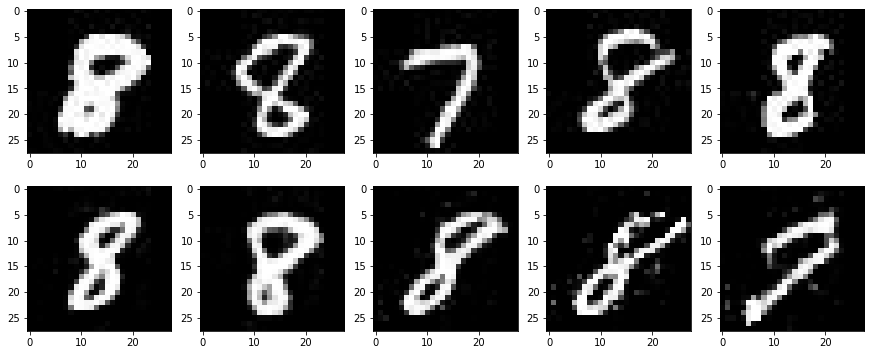

In [ ]:
# 生成画像と訓練データを可視化する
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 入力の乱数生成
batch_size = 8
z_dim = 20
fixed_z = torch.randn(batch_size, z_dim)
G_update.eval()
fake_images = G_update(fixed_z.to(device))

# 訓練データ
batch_iterator = iter(train_dataloader)  # イテレータに変換
imgs = next(batch_iterator)  # 1番目の要素を取り出す


# 出力
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 上段に訓練データを
    plt.subplot(2, 5, i+1)
    plt.imshow(imgs[i][0].cpu().detach().numpy(), 'gray')

    # 下段に生成データを表示する
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_images[i][0].cpu().detach().numpy(), 'gray')

In [ ]:
def Anomaly_score(x, fake_img, z_out_real, D, Lambda=0.1):

    # テスト画像xと生成画像fake_imgのピクセルレベルの差の絶対値を求めて、ミニバッチごとに和を求める
    residual_loss = torch.abs(x-fake_img)
    residual_loss = residual_loss.view(residual_loss.size()[0], -1)
    residual_loss = torch.sum(residual_loss, dim=1)

    # テスト画像xと生成画像fake_imgを識別器Dに入力し、特徴量マップを取り出す

    _, x_feature = D(x, z_out_real)
    _, G_feature = D(fake_img, z_out_real)

    # テスト画像xと生成画像fake_imgの特徴量の差の絶対値を求めて、ミニバッチごとに和を求める
    discrimination_loss = torch.abs(x_feature-G_feature)
    discrimination_loss = discrimination_loss.view(discrimination_loss.size()[0], -1)
    discrimination_loss = torch.sum(discrimination_loss, dim=1)

    # ミニバッチごとに2種類の損失を足し算する
    loss_each = (1-Lambda)*residual_loss + Lambda*discrimination_loss

    # ミニバッチ全部の損失を求める
    total_loss = torch.sum(loss_each)

    return total_loss, loss_each, residual_loss

In [ ]:
# テスト用のDataLoaderの作成

def make_test_datapath_list():
    """学習、検証の画像データとアノテーションデータへのファイルパスリストを作成する。 """

    train_img_list = list()  # 画像ファイルパスを格納

    for img_idx in range(20):
        img_path = "./data/test_28size/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test_28size/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test_28size/img_2_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list


# ファイルリストを作成
test_img_list = make_test_datapath_list()
print(test_img_list)

# Datasetを作成
mean = (0.5,)
std = (0.5,)
test_dataset = GAN_Img_Dataset(
    file_list=test_img_list, transform=ImageTransform(mean, std))

# DataLoaderを作成
batch_size = 60

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

['./data/test_28size/img_7_0.jpg', './data/test_28size/img_8_0.jpg', './data/test_28size/img_2_0.jpg', './data/test_28size/img_7_1.jpg', './data/test_28size/img_8_1.jpg', './data/test_28size/img_2_1.jpg', './data/test_28size/img_7_2.jpg', './data/test_28size/img_8_2.jpg', './data/test_28size/img_2_2.jpg', './data/test_28size/img_7_3.jpg', './data/test_28size/img_8_3.jpg', './data/test_28size/img_2_3.jpg', './data/test_28size/img_7_4.jpg', './data/test_28size/img_8_4.jpg', './data/test_28size/img_2_4.jpg', './data/test_28size/img_7_5.jpg', './data/test_28size/img_8_5.jpg', './data/test_28size/img_2_5.jpg', './data/test_28size/img_7_6.jpg', './data/test_28size/img_8_6.jpg', './data/test_28size/img_2_6.jpg', './data/test_28size/img_7_7.jpg', './data/test_28size/img_8_7.jpg', './data/test_28size/img_2_7.jpg', './data/test_28size/img_7_8.jpg', './data/test_28size/img_8_8.jpg', './data/test_28size/img_2_8.jpg', './data/test_28size/img_7_9.jpg', './data/test_28size/img_8_9.jpg', './data/test_

torch.Size([60, 1, 28, 28])


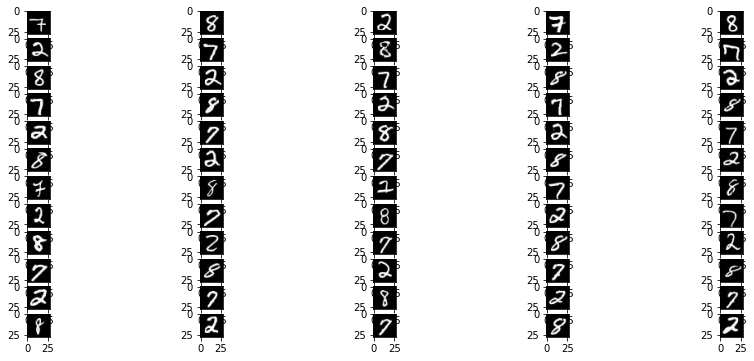

In [ ]:
# テストデータの確認
batch_iterator = iter(test_dataloader)  # イテレータに変換
imgs = next(batch_iterator)
print(imgs.shape) 

# 1番目のミニバッチを取り出す

fig = plt.figure(figsize=(15, 6))
for i in range(0, 60):
    plt.subplot(12, 5, i+1)
    plt.imshow(imgs[i][0].cpu().detach().numpy(), 'gray')

total loss： [181. 245. 303. 289. 214. 255. 174. 221. 262. 256. 219. 268. 156. 222.
 286. 233. 213. 253. 200. 247. 261. 131. 278. 264. 110. 170. 266. 166.
 221. 277. 196. 221. 257. 137. 185. 228. 216. 181. 288. 162. 294. 246.
 126. 173. 272. 203. 219. 275. 160. 269. 268. 160. 229. 251. 128. 222.
 271. 132. 195. 238.]
テストデータ


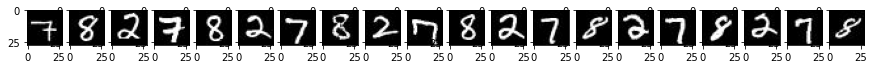

生成データ


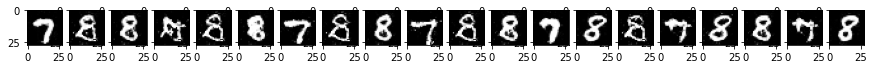

In [ ]:
# 異常検知したい画像
x = imgs
x = x.to(device)

# 教師データの画像をエンコードしてzにしてから、Gで生成
E_update.eval()
G_update.eval()
z_out_real = E_update(imgs.to(device))
imgs_reconstract = G_update(z_out_real)

# 損失を求める
loss, loss_each, residual_loss_each = Anomaly_score(
    x, imgs_reconstract, z_out_real, D_update, Lambda=0.1)

# 損失の計算。トータルの損失
loss_each = loss_each.cpu().detach().numpy()
print("total loss：", np.round(loss_each, 0))

# 画像を可視化
print('テストデータ')
fig = plt.figure(figsize=(15, 6))
for i in range(0, 20):
    # 上段に訓練データを
    plt.subplot(2, 20, i+1)
    plt.imshow(imgs[i][0].cpu().detach().numpy(), 'gray')
plt.show()

print('生成データ')
fig = plt.figure(figsize=(15, 6))
for i in range(0, 20):
    # 下段に生成データを表示する
    plt.subplot(2, 20, i+1)
    plt.imshow(imgs_reconstract[i][0].cpu().detach().numpy(), 'gray')
plt.show()

In [ ]:
'''テストデータのlossをデータフレーム化'''

test_df = pd.DataFrame({'files': test_img_list})
test_df['label'] = test_df['files'].apply(lambda x: x.split('_')[2])
test_df['loss'] = loss_each
test_df.head()

,files,label,loss
0,./data/test_28size/img_7_0.jpg,7,181.061523
1,./data/test_28size/img_8_0.jpg,8,244.705612
2,./data/test_28size/img_2_0.jpg,2,302.557495
3,./data/test_28size/img_7_1.jpg,7,289.469482
4,./data/test_28size/img_8_1.jpg,8,213.528061


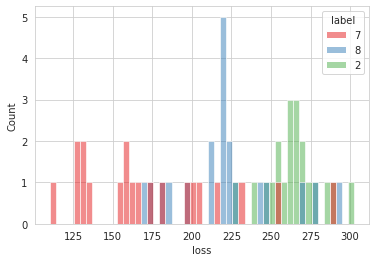

In [ ]:
'''テストデータのlossを可視化'''

sns.set_style('whitegrid')
sns.set_palette('Set1')
sns.histplot(data=test_df, x='loss', hue='label', alpha=0.5, bins=50)
plt.show()